In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Step 1: Load dataset
df = pd.read_csv("Students.csv")

In [3]:
# Step 2: Handle missing values (drop rows missing key info)
df = df.dropna(subset=["Daily_Usage_Hours", "Impact_on_Grades", "Stream"])


In [4]:
# Step 3: Calculate average grade impact by stream
avg_impact = df.groupby("Stream")["Impact_on_Grades"].mean().sort_values(ascending=False)
print("Average Impact on Grades by Stream:\n", avg_impact, "\n")


Average Impact on Grades by Stream:
 Stream
Arts                0.317191
Science             0.166948
Medical             0.067616
Commerce            0.063187
Management         -0.081579
Pharmacy           -0.091270
Engineering        -0.112871
Law                -0.130081
Hotel-management   -0.135220
Agriculture        -0.282443
Name: Impact_on_Grades, dtype: float64 



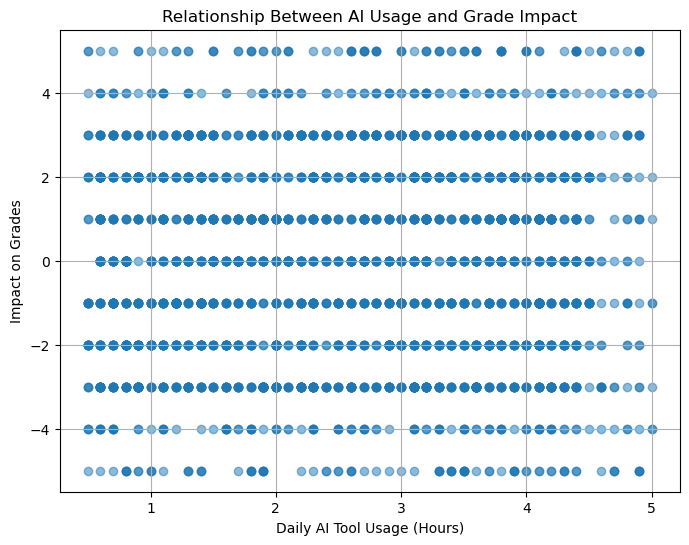

In [5]:
# Step 4: Visualize the relationship between AI usage and grade impact
plt.figure(figsize=(8,6))
plt.scatter(df["Daily_Usage_Hours"], df["Impact_on_Grades"], alpha=0.5)
plt.title("Relationship Between AI Usage and Grade Impact")
plt.xlabel("Daily AI Tool Usage (Hours)")
plt.ylabel("Impact on Grades")
plt.grid(True)
plt.show()